In [83]:
import pandas as pd
import numpy as np
# import geopy
# from geopy.distance import geodesic as GD
# from geopy import Point
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
bikes = pd.read_csv(r'../data/df_1_year.csv')

In [3]:
bikes[bikes['start_station_name'].isna()].head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00


In [4]:
bikes['rideable_type'].value_counts()

classic_bike     1663393
electric_bike    1483437
docked_bike        89057
Name: rideable_type, dtype: int64

In [5]:
bikes.describe()

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,Year,Month,ride_length
count,3.235887e+06,3.235887e+06,3.235887e+06,3.235669e+06,3.235669e+06,3.235887e+06,3.235887e+06,3.235887e+06
mean,3.463536e+05,4.190135e+01,-8.764817e+01,4.190154e+01,-8.764835e+01,2.021525e+03,7.268139e+00,1.260825e+01
std,2.264062e+05,4.682097e-02,3.033355e-02,4.695840e-02,3.047241e-02,4.993954e-01,2.465169e+00,8.815981e+00
min,0.000000e+00,4.164000e+01,-8.784000e+01,4.160000e+01,-8.787000e+01,2.021000e+03,1.000000e+00,1.666667e-02
25%,1.491620e+05,4.188169e+01,-8.766358e+01,4.188169e+01,-8.766371e+01,2.021000e+03,6.000000e+00,5.916667e+00
50%,3.189830e+05,4.190000e+01,-8.764414e+01,4.190022e+01,-8.764414e+01,2.022000e+03,7.000000e+00,1.023333e+01
75%,5.355470e+05,4.193000e+01,-8.762979e+01,4.193000e+01,-8.762979e+01,2.022000e+03,9.000000e+00,1.726667e+01
max,8.234870e+05,4.207000e+01,-8.752000e+01,4.211000e+01,-8.750000e+01,2.022000e+03,1.200000e+01,4.028333e+01


In [6]:
bikes.shape

(3235887, 18)

In [7]:
# import sweetviz as sv
# #You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
# my_report = sv.analyze(bikes)
# my_report.show_html()

In [15]:
# bikes['start_point'] = bikes.apply(lambda row: Point(latitude=row['start_lat'], longitude=row['start_lng']), axis=1)

In [18]:
bikes = bikes[bikes['end_lat'].notna()]

In [19]:
# bikes['end_point'] = bikes.apply(lambda row: Point(latitude=row['end_lat'], longitude=row['end_lng']), axis=1)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_76801/3036927553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['end_point'] = bikes.apply(lambda row: Point(latitude=row['end_lat'], longitude=row['end_lng']), axis=1)


In [20]:
# bikes.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,start_point,end_point
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 40m 48s W"
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 37m 48s W"
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,"41 57m 1.02318e-11s N, 87 39m 2.04636e-11s W","41 58m 12s N, 87 39m 36s W"
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,"41 48m 36s N, 87 36m 36s W","41 47m 60s N, 87 35m 60s W"
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,"41 46m 12s N, 87 37m 12s W","41 48m 36s N, 87 36m 36s W"


In [13]:
# bikes['dist'] = GD((bikes['start_lng'], bikes['start_lat']), (bikes['end_lng'], bikes['end_lat'])).km

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [29]:
def manhattan(s_long, s_lat, e_long, e_lat):
    dif_long = abs(s_long - e_long)
    dif_lat = abs(s_lat - e_lat)

    dif_long_km = dif_long * abs(math.cos(s_lat)) * 111.320
    dif_lat_km = dif_lat * 110.574

    return dif_long_km + dif_lat_km

In [30]:
bikes['manh_dist'] = bikes.apply(lambda row: manhattan(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_76801/2539045171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['manh_dist'] = bikes.apply(lambda row: manhattan(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)


In [31]:
bikes.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,start_point,end_point,manh_dist
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,...,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 40m 48s W",0.000000
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,...,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 37m 48s W",3.330686
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,...,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,"41 57m 1.02318e-11s N, 87 39m 2.04636e-11s W","41 58m 12s N, 87 39m 36s W",2.707180
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,...,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,"41 48m 36s N, 87 36m 36s W","41 47m 60s N, 87 35m 60s W",1.735678
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,...,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,"41 46m 12s N, 87 37m 12s W","41 48m 36s N, 87 36m 36s W",5.089097


In [32]:
def haversine(s_long, s_lat, e_long, e_lat):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [s_long, s_lat, e_long, e_lat])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [33]:
bikes['haver_dist'] = bikes.apply(lambda row: haversine(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_76801/2817421626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['haver_dist'] = bikes.apply(lambda row: haversine(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)


In [34]:
bikes.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_lng,member_casual,Year,Month,ride_length,Year-Month,start_point,end_point,manh_dist,haver_dist
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,...,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 40m 48s W",0.000000,0.000000
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,...,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 37m 48s W",3.330686,4.146597
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,...,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,"41 57m 1.02318e-11s N, 87 39m 2.04636e-11s W","41 58m 12s N, 87 39m 36s W",2.707180,2.372640
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,...,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,"41 48m 36s N, 87 36m 36s W","41 47m 60s N, 87 35m 60s W",1.735678,1.386885
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,...,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,"41 46m 12s N, 87 37m 12s W","41 48m 36s N, 87 36m 36s W",5.089097,4.524405


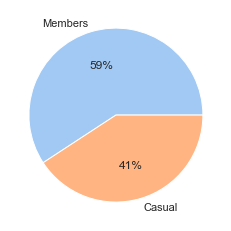

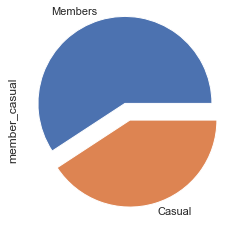

In [51]:
mylabels = ["Members", "Casual"]
colors = sns.color_palette('pastel')
#create pie chart
sns.set_theme(style='white')
plt.pie(bikes['member_casual'].value_counts(), labels = mylabels, colors = colors, autopct='%.0f%%')
plt.show()

bikes['member_casual'].value_counts().plot.pie(labels=mylabels, explode=[0.2,0]);

In [99]:
monthly_bikes = bikes['Month'].value_counts()
angles=np.linspace(0,2*np.pi,len(monthly_bikes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
print(angles)
monthly_bikes = pd.DataFrame(monthly_bikes.sort_index())
monthly_bikes.reset_index(inplace=True)
monthly_bikes = monthly_bikes.append({'Month':48289, 'index': 1}, ignore_index=True)

[0.         0.52359878 1.04719755 1.57079633 2.0943951  2.61799388
 3.14159265 3.66519143 4.1887902  4.71238898 5.23598776 5.75958653
 0.        ]


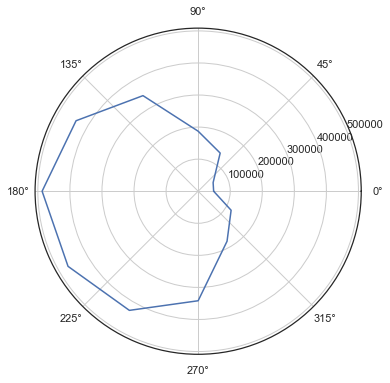

In [80]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
ax.plot(angles,monthly_bikes['Month'])
plt.show()

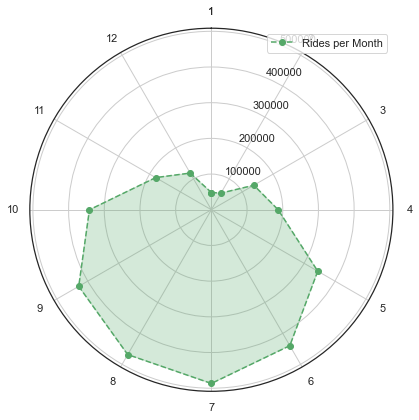

In [82]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
#basic plot
ax.plot(angles,monthly_bikes['Month'], 'o--', color='g', label='Rides per Month')
#fill plot
ax.fill(angles, monthly_bikes['Month'], alpha=0.25, color='g')
#Add labels
ax.set_thetagrids(angles * 180/np.pi, monthly_bikes['index'])
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [109]:
monthly_bikes.columns = ["Month", 'Value']
monthly_bikes

,Month,Value
0,1,48289
1,2,53909
2,3,137404
3,4,187180
4,5,344213
5,6,439700
6,7,486722
7,8,468613
8,9,429108
9,10,341627


In [123]:
fig = px.line_polar(monthly_bikes, r='Value', theta=[30*i for i in range(13)], line_close=False)
fig.update_traces(fill='toself')
fig.show()

In [120]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=monthly_bikes['Value'],
    theta=[30*i + 90 for i in range(12)],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, 500000], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=False, ticks='')
    )
)

fig.show()


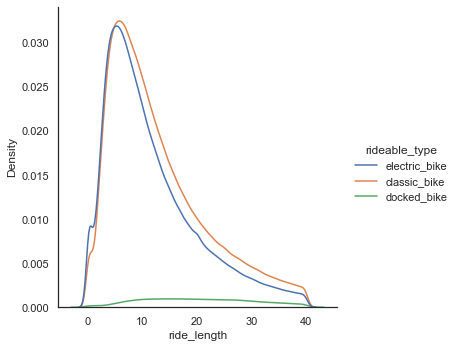

In [144]:
sns.displot(bikes, x="ride_length", hue="rideable_type", kind='kde');

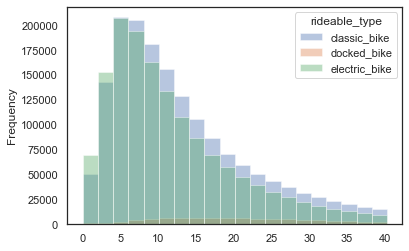

In [172]:
bikes.pivot(columns="rideable_type", values="ride_length").plot.hist(bins=20, alpha=0.4);

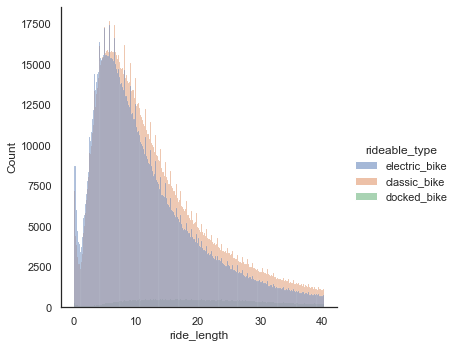

In [156]:
sns.displot(bikes, x="ride_length", hue="rideable_type");